First, we need to import the libraries needed to have access to functions.py and various other libraries

In [1]:
import sys
import os

We append our to working path the ../src path, where functions.py lies

In [2]:
# need to be able to import src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# absolute path to the src directory
src_path = os.path.abspath("../src")

# Add src directory to system path
sys.path.append(src_path)

# get the /MLCBAss1/Assignment-2 path
ass_path=sys.path[-2]

print(ass_path)

/home/sdi1700187/MLCBAss2/Assignment-2


We import everything from functions.py. Also the first two line ensure that everytime we change something to functions.py, this change can be "seen" here

In [3]:
%load_ext autoreload
%autoreload 2

from functions import *

/home/sdi1700187/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We will loda the dev dataset and we will print its columns. Just to make sure that nothing went wrong during the splitting

In [4]:
df=pd.read_csv('../data/dev_breast_cancer.csv')
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In this version of the assignment, the 'rncv_summary_results.csv' file can be found in the data directory. This file includes the results from applying the repeated nested cross validation technique on the dev data set. From this file, we select the best model. If you want to run the pipeline again or use it on a different dataset, just remove the 'rncv_summary_results.csv' file.

In [5]:
from pathlib import Path

my_file = Path("../data/rncv_summary_results.csv")
if not my_file.is_file():
    perform_rnCV(path='../data/dev_breast_cancer.csv')

From the 'rncv_summary_results.csv' we elect our winner. The idea is pretty simple, as we count the number of metrics that each model scores the highest. Therefore, we find out that our best model is LogisticRegression, with SVM being close second as they tied in some key metrics. However, LogisticRegression reigned supreme in all the other metrics. Also, we need to consider the explainability of LogisticRegression, especially in such biological tasks, as we care not only for the final predictions but for an explaination of said predictions as well

[I 2025-05-06 15:13:28,155] A new study created in memory with name: Winner:LogisticRegression


The winner method is LogisticRegression with 9/9 metrics
 ALL HAIL THE KING!


[I 2025-05-06 15:13:30,505] Trial 0 finished with value: 0.5126008064516129 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.00908675385615437, 'l1_ratio': 0.5361096225906884}. Best is trial 0 with value: 0.5126008064516129.
[I 2025-05-06 15:13:32,765] Trial 1 finished with value: 0.9706752055660974 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.13995126387887355, 'l1_ratio': 0.24479233882170792}. Best is trial 1 with value: 0.9706752055660974.
[I 2025-05-06 15:13:34,963] Trial 2 finished with value: 0.9347979917773561 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.023738674510282026, 'l1_ratio': 0.8423443030469354}. Best is trial 1 with value: 0.9706752055660974.
[I 2025-05-06 15:13:37,114] Trial 3 finished with value: 0.9487646268184694 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.01074585576975407, 'l1_ratio': 0.9274618835905488}. Best is trial 1 with value: 0.9706752055660974.
[I 2025-05-06 15:13:39,258] Trial 4 finished with 

EARLY STOPPING: No improvement after 10 trials!
--> Best trial is 6 with value: 0.9749644212523719 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.35456021819499367, 'l1_ratio': 0.07540636578361226}

For model LogisticRegression the best parameters are {'penalty': 'l1', 'solver': 'saga', 'C': 0.35456021819499367, 'l1_ratio': 0.07540636578361226}
Bootstrapped 95% CIs (Model trained on dev, tested on val):
Balanced Accuracy: [0.8850, 0.9868]
F1 Score       : [0.8525, 0.9846]
Precision      : [0.8484, 1.0000]
Recall         : [0.8065, 1.0000]
MCC            : [0.7864, 0.9778]
ROC AUC        : [0.9489, 0.9974]
PR AUC         : [0.9252, 0.9950]
Specificity         : 0.9706
NPV                 : 0.9565


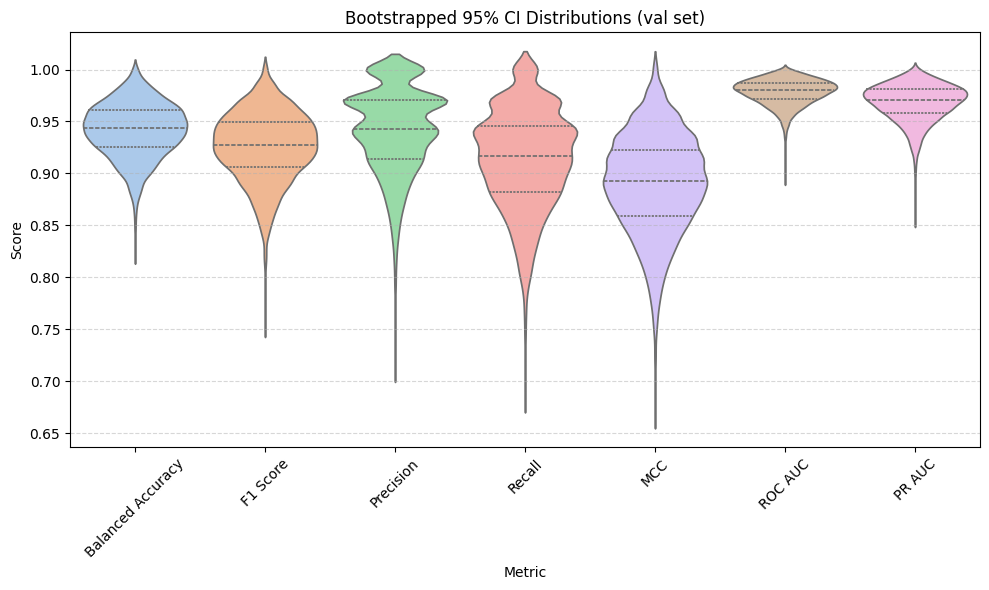

[I 2025-05-06 15:17:50,025] A new study created in memory with name: Winner:LogisticRegression
[I 2025-05-06 15:17:52,362] Trial 0 finished with value: 0.5 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.0014363901686146635, 'l1_ratio': 0.7061060917460982}. Best is trial 0 with value: 0.5.
[I 2025-05-06 15:17:54,682] Trial 1 finished with value: 0.5 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.0011462736004383184, 'l1_ratio': 0.3620828138542941}. Best is trial 0 with value: 0.5.
[I 2025-05-06 15:17:56,988] Trial 2 finished with value: 0.5 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.0026351726574674146, 'l1_ratio': 0.6489649142396695}. Best is trial 0 with value: 0.5.
[I 2025-05-06 15:17:59,391] Trial 3 finished with value: 0.9507586875843457 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.0158213676307667, 'l1_ratio': 0.354664697929734}. Best is trial 3 with value: 0.9507586875843457.
[I 2025-05-06 15:18:01,661]

EARLY STOPPING: No improvement after 10 trials!
--> Best trial is 21 with value: 0.9716523279352227 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.38652698468133584, 'l1_ratio': 0.44373053475561663}

For model LogisticRegression the best parameters are {'penalty': 'l2', 'solver': 'saga', 'C': 0.38652698468133584, 'l1_ratio': 0.44373053475561663}


In [6]:
if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_summary_results.csv")

results_df=replace_column(df=results_df,to_be_replaced='Unnamed: 0',to_be_added='Model')

results_df.to_csv("../data/rncv_summary_results.csv",index=False)

if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_summary_results.csv")


winner=get_winner(summary=results_df)

print(f"The winner method is {winner[0]} with {winner[1]}/{results_df.shape[1]-1} metrics\n ALL HAIL THE KING!")

df_dev=pd.read_csv('../data/dev_breast_cancer.csv')
df_complete=pd.read_csv('../data/breast_cancer.csv')
df_val=pd.read_csv('../data/val_clean_breast_cancer.csv')

tuned_winner_dev=winner_tuning(df=df_dev,winner=winner[0])

bootstrap_model(df_dev=df_dev,df_val=df_val,model=tuned_winner_dev)

tuned_winner_complete=winner_tuning(df=df_complete,winner=winner[0])

As we have tuned and evaluated the winner model with the help of bootstrapping in the above cell, we are now able to save it. Because we have applied some data cleaning(imputation,scaling,transformation etc), we will not just save the model. We will save an entire pipeline that includes all those steps, along with the final model, thus ensuring that we can infere on new unseen data withou any issues

In [10]:
save_winner(path='../data/breast_cancer.csv',winner=tuned_winner_complete,winner_name=winner[0])

Saving winner model (LogisticRegression) with name winner.pkl


Next, we will take advantage of Linear Regression explainability and we will output the 10 most influential features to classification of a tumor. This property of the model is highly desirable, as we care not only for the classification of each tumor to Benign or Malignant, but also we strive to understand which component or property of the tumor plays a vital role in its nature

                Feature  Coefficient  abs_coeff
22        texture_worst     0.877582   0.877582
14              area_se     0.806722   0.806722
8   concave points_mean     0.771594   0.771594
7        concavity_mean     0.752548   0.752548
2          texture_mean     0.742160   0.742160
27      concavity_worst     0.735503   0.735503
29       symmetry_worst     0.662436   0.662436
11            radius_se     0.656472   0.656472
16       compactness_se    -0.636949   0.636949
24           area_worst     0.595690   0.595690


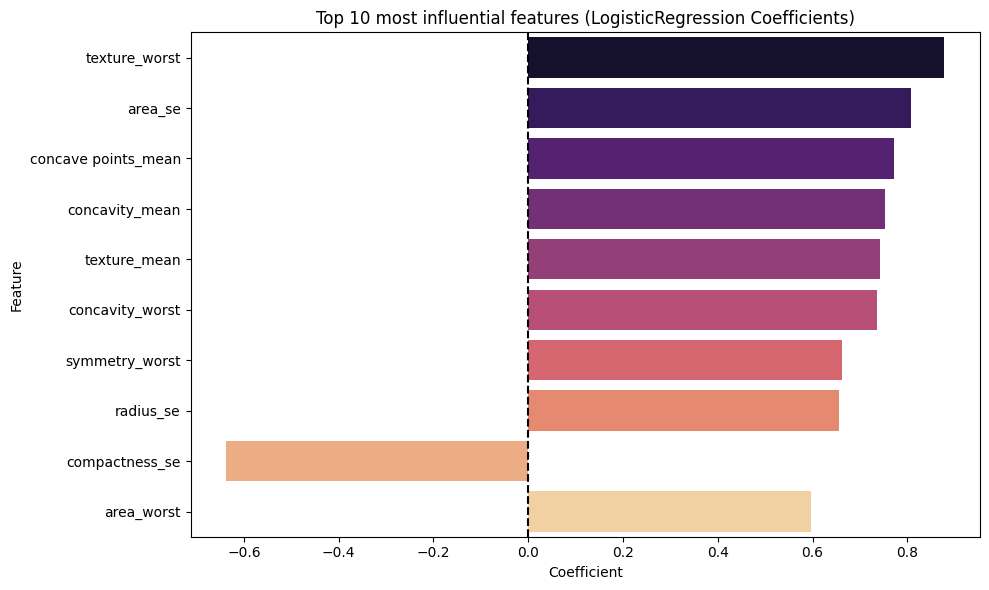

In [15]:
x,y=keep_features(data_df=df_complete)
features=x.columns

top_coefficients_winner(top=10,names=features)

As it can be seen in the cell below, by simply uncommenting the two lines of code and replacing 'PATH_TO_UNSEEN_DATASET' with the actual path of the test dataset, one can very easily perform inference by using our winner model. For lack of such dataset, that is a dataset with completely unseen data, we performed inference by utilizing the val dataset. This is JUST TO MAKE SURE THAT THE SAVED PIPELINE COMPILES without issues.

In [ ]:
# to perform inference, uncomment the following lines and replace PATH_TO_UNSEEN_DATASET with the proper path
# unseen_path='PATH_TO_UNSEEN_DATASET'
# infere_with_winner(test_df_path=unseen_path)

   predicted_diagnosis
0                    1
1                    1
2                    1
3                    1
4                    0
